<a href="https://colab.research.google.com/github/cyberfenrir/Visualizing-cnn-filters/blob/main/Visualizing_Filters_of_a_CNN_using_gradient_ascent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Visualizing Filters of a CNN**

## Downloading the Model

In [ ]:
import tensorflow as tf
import random
import matplotlib.pyplot as plt

print('tensorflow verson', tf.__version__)


tensorflow verson 2.5.0


In [ ]:
model = tf.keras.applications.vgg16.VGG16(
    include_top=False,weights='imagenet',input_shape=(96,96,3)) #96 rows 96 columns 3 channels
model.summary()


58892288/58889256 [==============================] - 1s 0us/step
Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 48, 48, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 48, 48, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 48, 48, 128)       147584    
______________________________________________________________

Get Layer Output/ Creating Sub models

In [8]:
def get_submodel(layer_name):
  return tf.keras.models.Model(
      model.input,
      model.get_layer(layer_name).output
  ) #creating submodels to work on specific layers

get_submodel('block1_conv2').summary()

  

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 96, 96, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 96, 96, 64)        36928     
Total params: 38,720
Trainable params: 38,720
Non-trainable params: 0
_________________________________________________________________


Image Visualization Function

In [24]:
def create_image():
  return tf.random.uniform((96,96,3),minval= -0.5, maxval= 0.5) #generaying noise i.e., random image. also can add min val and max val eg.: minval = -0.5, maxval = 0.5

def plot_image(image, title="random"):
  image= image - tf.math.reduce_min(image)
  image= image/tf.math.reduce_max(image) #scaling image to be in a range of 0-1
  plt.imshow(image)
  plt.xticks([])
  plt.yticks([])
  plt.title(title)
  plt.show()


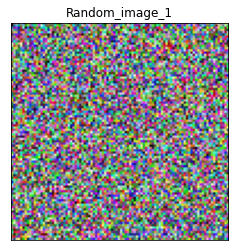

In [14]:
image= create_image()
plot_image(image,title="Random_image_1")

Training Loop

In [21]:
def visualize_filter(layer_name, f_index=None, iters= 50):
  submodel = get_submodel(layer_name)
  num_filters = submodel.output.shape[-1]

  if f_index is None:
    f_index = random.randint(0, num_filters-1)
  assert num_filters > f_index, 'f_index is out of bounds'   #check if number of filters is greater than filter index and if it is then return an error msg.

  image = create_image()
  verbose_step= int(iters/10) #keeping a track of loss

  #gradient ascent algorithm to maximise the loss value

  for i in range(0, iters):
    with tf.GradientTape() as tape:
      tape.watch(image)
      out = submodel(tf.expand_dims(image, axis= 0))[:,:,:,f_index]  #expanding dimensions
      loss = tf.math.reduce_mean(out)
    grads= tape.gradient(loss,image) #generating gradients
    grads =tf.math.l2_normalize(grads) #normalising gradients
    image+= grads * 10   #multiplying by 10 for faster process

    if (i + 1) % verbose_step == 0:
      print(f'Iteration:{i+1}, loss: {loss.numpy(): 4f}')   #keeping track of loss
  
  plot_image(image, f'{layer_name}, {f_index}') 


Final Results

Iteration:5, loss:  1.609088
Iteration:10, loss:  5.061857
Iteration:15, loss:  9.071414
Iteration:20, loss:  13.788280
Iteration:25, loss:  18.456064
Iteration:30, loss:  23.691717
Iteration:35, loss:  29.378469
Iteration:40, loss:  34.959057
Iteration:45, loss:  41.148277
Iteration:50, loss:  47.825172


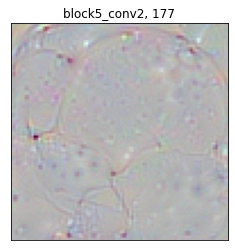

In [27]:
layer_name = 'block5_conv2'
visualize_filter(layer_name)
